# Activity Analysis Demonstration script
This notebook draws from the demo 1 file of ActivityAnalysisToolbox_2.1

In [1]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.signal import butter,filtfilt
from scipy.interpolate import interp1d

In [2]:
# import activity analysis functions from aa.py file in the same folder as this jupiter notebook
%load_ext autoreload
%autoreload 1
%aimport aa

In [3]:
# load data, for now in mat files. Change for csv?
import scipy.io
mat = scipy.io.loadmat('data/Korhonen.mat')
c = mat['Kor']
Kor = []
for stim in range(len(c)):
    Data = pd.DataFrame()
    Time = []
    t = c[stim][0][0][0][0]
    d = c[stim][0][0][0][1]
    for i in range(len(c[11][0][0][0][0])):
        Time.append(t[i][0])
        Data = Data.append( pd.Series(d[i]), ignore_index=True)
    Data.index = Time
    sF = c[stim][0][0][0][2][0][0]
    Np = c[stim][0][0][0][3][0][0]
    Measure = c[stim][0][0][0][4][0]
    Piece = c[stim][0][0][0][5][0]
    Audience = c[stim][0][0][0][6][0]
    NrData = pd.DataFrame()
    d = c[stim][0][0][0][7]
    for i in range(len(c[11][0][0][0][0])):
        NrData = NrData.append( pd.Series(d[i]), ignore_index=True)
    NrData.index = Time
    NzData = pd.DataFrame()
    d = c[stim][0][0][0][8]
    for i in range(len(c[11][0][0][0][0])):
        NzData = NzData.append( pd.Series(d[i]), ignore_index=True)
    NzData.index = Time
    Spec = c[stim][0][0][0][9]
    coll = {'Time':Time,
       'Data': Data,
       'sF':sF,
       'Np':Np,
       'Measure':Measure,
       'Piece':Piece,
       'Audience':Audience,
       'NrData':NrData,
       'NzData': NzData,
       'Spec':Spec}
    Kor.append(coll)

Select a collection of ratings to run an analysis on

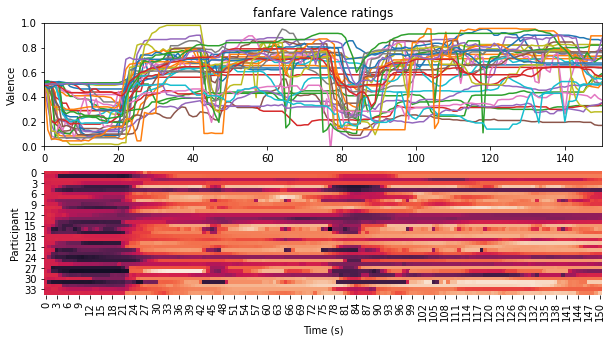

In [5]:
collN = 5
D = Kor[collN]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(211)
D['Data'].plot(ax=ax,legend=False)
plt.ylim(0,1)
plt.xlim(D['Time'][0],D['Time'][-1])
plt.title(D['Piece'] + ' ' + D['Measure'] + ' ratings')
plt.ylabel(D['Measure'])

ax = fig.add_subplot(212)
sns.heatmap(D['Data'].transpose(),ax=ax,cbar=False)#, cmap="YlGnBu")
plt.ylabel('Participant')
plt.xlabel('Time (s)')
plt.show()

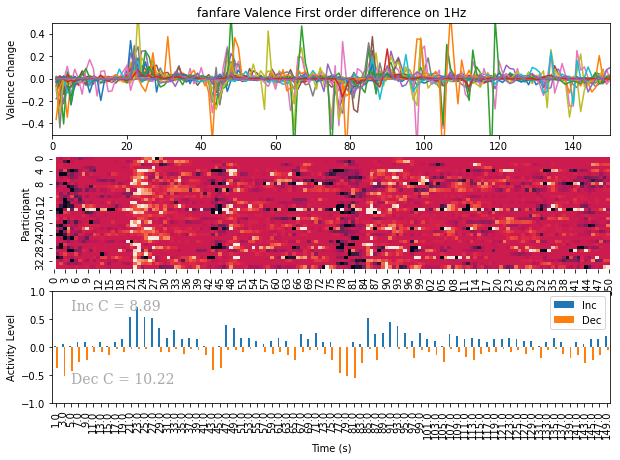

In [6]:
font = {'family': 'serif',
        'color':  'darkgrey',
        'weight': 'normal',
        'size': 14,
        }

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(311)
D['Data'].diff().plot(ax=ax,legend=False)
plt.ylim(-0.5,0.5)
plt.xlim(D['Time'][0],D['Time'][-1])
plt.title(D['Piece'] + ' ' + D['Measure'] + ' First order difference on ' + str(D['sF']) + 'Hz')
plt.ylabel(D['Measure'] + ' change')
ax = fig.add_subplot(312)
sns.heatmap(D['Data'].diff().transpose(),ax=ax,cbar=False,vmin=-0.1, vmax=0.1)#, cmap="YlGnBu")
plt.ylabel('Participant')

FrameSize = 2
HopSize = 2
Thresh = 0.025
Nbins = 5
ACTS=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Inc')
AC=pd.DataFrame({'Inc':ACTS['Total']})
ACTS=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Dec')
AC['Dec'] = -ACTS['Total']
ax = fig.add_subplot(313)
AC.plot.bar(ax=ax)
plt.ylim(-1,1)
#plt.xlim(D['Time'][0],D['Time'][-1])
plt.ylabel('Activity Level')
plt.xlabel('Time (s)')

actType = 'Inc'
CInc = aa.coordScoreSimple(D['Data'],FrameSize,Thresh,actType,Nbins)
plt.text(2, 0.65, actType + ' C = ' + str(np.round(CInc,2)), fontdict=font)
actType = 'Dec'
CDec = aa.coordScoreSimple(D['Data'],FrameSize,Thresh,actType,Nbins)
plt.text(2, -0.65, actType + ' C = ' + str(np.round(CDec,2)), fontdict=font)
plt.show()





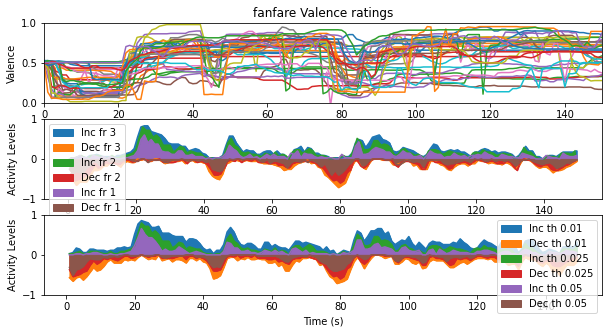

In [6]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(311)
D['Data'].plot(ax=ax,legend=False)
plt.ylim(0,1)
plt.xlim(D['Time'][0],D['Time'][-1])
plt.title(D['Piece'] + ' ' + D['Measure'] + ' ratings')
plt.ylabel(D['Measure'])

ax = fig.add_subplot(312)
for fr in [3,2,1]:
    FrameSize = fr
    HopSize = 1
    Thresh = 0.025
    Nbins = 5
    ACTS=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Inc')
    AC=pd.DataFrame({'Inc fr '+ str(fr):ACTS['Total']})
    ACTS=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Dec')
    AC['Dec fr '+ str(fr)] = -ACTS['Total']
    AC.plot.area(ax=ax)

plt.ylim(-1,1)
plt.ylabel('Activity Levels')
plt.legend()


ax = fig.add_subplot(313)
for th in [0.01,0.025,0.05]:
    FrameSize = 2
    HopSize = 1
    Thresh = th
    Nbins = 5
    ACTS=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Inc')
    AC=pd.DataFrame({'Inc th '+ str(th):ACTS['Total']})
    ACTS=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Dec')
    AC['Dec th '+ str(th)] = -ACTS['Total']
    AC.plot.area(ax=ax)

plt.ylim(-1,1)
plt.ylabel('Activity Levels')
plt.legend()
plt.xlabel('Time (s)')

plt.show()

In [ ]:
# alternating activity definition doesn't work yet

# Acts1=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Inc')
# Acts2=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Dec')
# st =  aa.alternatingActivitiesTest(Acts1,Acts2,nBins=3)
# CAlt = aa.coordScoreAlternating(D['Data'],FrameSize,Thresh,'Inc',Thresh,'Dec',Nbins=3)

# fig = plt.figure(figsize=(9,4))
# ax = fig.add_subplot(121)
# sns.heatmap(st['Measured'], ax = ax)
# plt.text(16, 12,'Alt C = ' + str(np.round(CAlt,2)), fontdict=font)
# ax = fig.add_subplot(122)
# sns.heatmap(st['Model'], ax = ax)
# plt.show()

In [82]:
cuts1 = aa.equisplit(MeasuredAll['Measured'],nBins ,nBins*6);
MeasuredAll['Measured']

0      0
1      0
2      0
3      0
4      3
5      2
6      6
7      9
8      8
9     10
10     5
11     7
12     4
13     1
14     6
15     1
16     5
17     0
18     2
19     1
20     3
21     0
22     1
23     0
24     0
25     0
26     1
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
Name: Measured, dtype: int64

In [84]:
from scipy.stats import binom,chi2
from math import comb
FrameSize = 2
HopSize = 2
Thresh = 0.025
Nbins = 5
Acts1=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Inc')
#AC=pd.DataFrame({'Inc':ACTS['Total']})
Acts2=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Dec')
#AC['Dec'] = -ACTS['Total']

# [Chi,p,DAct,Bins,v1,v2] = alternatingActivitiesTest(AllC1,AllC2,k)
def alternatingActivitiesTest(Acts1,Acts2,nBins = 3): 
    N = Acts1.shape
    Np = N[1]-1
    print(Np)
    L = N[0]
    AC1 =  np.round(Acts1['Total']*Np)
    Acts1 = Acts1.drop(columns=['Total'])
    AC2 =  np.round(Acts2['Total']*Np)
    Acts2 = Acts2.drop(columns=['Total'])

    if L<50:
        print('Too few frames for analysis.')
        #return
    if (Acts1+Acts2).max().max()>1:
        print('These forms of activity are not exclusive, use the biact function instead.')
        #return

    # two criteria for evaluating distribution: Total activity and ratio of one or the other
    ACall =  AC1 + AC2
    p = ACall.sum()/(Np*L) # probability of any activity
    p1 = AC1.sum()/(Np*L) 
    p2 = AC2.sum()/(Np*L)
    p12 = p2/p
    MeasuredAll = pd.DataFrame(0,index = aL,columns = ['Measured'])
    meas = pd.Series(ACall).value_counts()
    MeasuredAll.loc[meas.index,'Measured'] = meas.values


    aL = np.arange(Np+1)
    Model = pd.DataFrame(index = aL)

    for s in range(Np+1):
        subcount = pd.Series(0.0,index = aL)
        for r in range(s+1):
            if s == 0:
                idx = int(0.5*Np)
            else:
                idx = int(Np*(r)/(s+1))
            if s <= 50:
                subcount[idx] = comb(s,r)*((1-p12)**(s-r))*(p12**r)
            else:
                subcount[idx]=math.exp(-s*p12)*((s*p12)**r)/math.factorial(r)
        Model[s] = subcount*MeasuredAll.loc[s].values
    Independent = Model.sum(1)

    Measured = pd.DataFrame(index = aL)
    for s in range(Np+1):
        sub=AC2[ACall==s].value_counts()
        subcount = pd.Series(0.0,index = aL)
        if len(sub)>0:
            subcount = pd.Series(0.0,index = aL)
            for r in sub.index:
                if s == 0:
                    idx = int(0.5*Np)
                else:
                    idx = int(Np*(r)/(s+1))
                subcount[idx] = sub.loc[r]
        Measured[s] = subcount

    cuts1 = aa.equisplit(Independent,nBins ,nBins*6);
    cuts2 = aa.equisplit(MeasuredAll['Measured'],nBins ,nBins*6);

    tabMod = pd.DataFrame()
    tabMea = pd.DataFrame()
    for j in range(len(cuts2)-1):
        a = []
        b = []
        for i in range(len(cuts1)-1):   
            A = Model.loc[cuts1[i]:cuts1[i+1]-1,cuts2[j]:cuts2[j+1]-1]
            a.append(A.sum().sum())
            B = Measured.loc[cuts1[i]:cuts1[i+1]-1,cuts2[j]:cuts2[j+1]-1]
            b.append(B.sum().sum())
        tabMod[j]=np.array(a)
        tabMea[j]=np.array(b)

    st = ((tabMod-tabMea)**2/tabMod).sum().sum()
    p = 1-chi2.cdf(st, sum(tabMod.shape)-2)

    stest = {'Chi2':st,'pvalue':p,'Model':Model,'Measured':Measured,'BinsModel':tabMod,'BinsMeasured':tabMea}
    return stest


35


In [19]:
# demonstrate activity evaluations on a single response, once more options are available (Inc Dec Change UBound Xup etc)

In [91]:
FrameSize = 2
HopSize = 2
Thresh = 0.025
Nbins = 5
Acts1=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Inc')
#AC=pd.DataFrame({'Inc':ACTS['Total']})
Acts2=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Dec')
stest = aa.alternatingActivitiesTest(Acts1,Acts2,nBins = 3) 

35


In [92]:
stest 

{'Chi2': 20.39650127808928,
 'pvalue': 0.0004169713406916298,
 'Model':      0    1    2    3         4         5         6         7         8   \
 0   0.0  0.0  0.0  0.0  0.258157  0.093214  0.151459  0.123049  0.059240   
 1   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
 2   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
 3   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.401093   
 4   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.728978  0.000000   
 5   0.0  0.0  0.0  0.0  0.000000  0.394451  0.769106  0.000000  0.000000   
 6   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
 7   0.0  0.0  0.0  0.0  0.873944  0.000000  0.000000  0.000000  1.188099   
 8   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  1.850870  0.000000   
 9   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
 10  0.0  0.0  0.0  0.0  0.000000  0.000000  1.627294  0.000000  0.000000   
 11  